In [1]:
import pandas as pd
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
happiness_df = pd.read_csv("Final_dataset.csv")
happiness_df.head()

,Unnamed: 0,Country,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year
0,0,Afghanistan,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,1.952100,2015
1,1,Afghanistan,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2.145580,2016
2,2,Afghanistan,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,2.150801,2017
3,3,Afghanistan,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,2.196000,2018
4,4,Afghanistan,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,1.792000,2019


In [3]:
covid_df = pd.read_csv("covid_data.csv")
covid_df.head()

,Country,Happiness Score 2019,Happiness Score 2020,Percent Change,Average Cases in 2020
0,Afghanistan,3.203,2.5669,-19.859506,27197.25000
1,Albania,4.719,4.8827,3.468955,12508.53691
2,Algeria,5.211,5.0051,-3.951261,34030.14469
3,Argentina,6.086,5.9747,-1.828788,487948.75330
4,Armenia,4.559,4.6768,2.583895,47559.07516


In [4]:
#checking number of countries in covid dataframe
covid_df["Country"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Afghanistan
1          Albania
2          Algeria
3        Argentina
4          Armenia
          ...     
135      Venezuela
136        Vietnam
137          Yemen
138         Zambia
139       Zimbabwe
Name: Country, Length: 140, dtype: object>

In [5]:
#create a dataframe with just the 2020 data
happiness_2020 = happiness_df.loc[happiness_df["Year"] == 2020]
happiness_2020.head()

,Unnamed: 0,Country,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year
5,5,Afghanistan,2.5669,0.300706,0.470367,52.590000,0.396573,0.135235,0.933687,1.507236,2020
11,11,Albania,4.8827,0.906653,0.671070,68.708138,0.781994,0.171028,0.896304,1.640897,2020
17,17,Algeria,5.0051,0.943856,0.803385,65.905174,0.466611,0.118915,0.735485,1.840812,2020
27,27,Argentina,5.9747,1.028466,0.900568,68.803802,0.831132,0.070100,0.842010,2.072541,2020
33,33,Armenia,4.6768,0.808262,0.757479,66.750656,0.712018,0.107226,0.773545,1.468162,2020


In [6]:
#checking number of countries in happiness 2020 dataframe
happiness_2020["Country"].value_counts

<bound method IndexOpsMixin.value_counts of 5      Afghanistan
11         Albania
17         Algeria
27       Argentina
33         Armenia
          ...     
910      Venezuela
916        Vietnam
922          Yemen
928         Zambia
934       Zimbabwe
Name: Country, Length: 153, dtype: object>

In [7]:
#Merge the happiness_2020 and covid_df dataframes to keep data for countries only present in both dataframes
#covid_df = covid_df.rename(columns = {'Country':'country'})

In [8]:
merged_df = happiness_2020.merge(covid_df, on = 'Country' , how = 'left')
merged_df.head()

,Unnamed: 0,Country,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year,Happiness Score 2019,Happiness Score 2020,Percent Change,Average Cases in 2020
0,5,Afghanistan,2.5669,0.300706,0.470367,52.590000,0.396573,0.135235,0.933687,1.507236,2020,3.203,2.5669,-19.859506,27197.25000
1,11,Albania,4.8827,0.906653,0.671070,68.708138,0.781994,0.171028,0.896304,1.640897,2020,4.719,4.8827,3.468955,12508.53691
2,17,Algeria,5.0051,0.943856,0.803385,65.905174,0.466611,0.118915,0.735485,1.840812,2020,5.211,5.0051,-3.951261,34030.14469
3,27,Argentina,5.9747,1.028466,0.900568,68.803802,0.831132,0.070100,0.842010,2.072541,2020,6.086,5.9747,-1.828788,487948.75330
4,33,Armenia,4.6768,0.808262,0.757479,66.750656,0.712018,0.107226,0.773545,1.468162,2020,4.559,4.6768,2.583895,47559.07516


In [9]:
#drop null values from merged dataframe

merged_df = merged_df.dropna(subset = ["Percent Change","Average Cases in 2020"])

In [10]:
#Regression 1: impact of average covid cases in 2020 on the percent change of happiness from 2019 through 2020
x = merged_df["Average Cases in 2020"]
y = merged_df["Percent Change"].tolist()

print(x)
print(y)

0       27197.250000
1       12508.536910
2       34030.144690
3      487948.753300
4       47559.075160
           ...      
148     41980.293520
149       637.607558
150      1437.240602
151      8421.740484
152      4656.038328
Name: Average Cases in 2020, Length: 140, dtype: float64
[-19.85950624, 3.468954567, -3.9512613130000003, -1.8287878080000002, 2.583895021, -0.071945517, 0.665193817, -0.829489881, 0.45652794, 8.456012365, 4.074766598, -0.859452289, 6.8195797670000005, -0.545077989, 5.349051652, -0.260895757, 1.199997794, 1.80602742, 3.961197362, 0.007947709, 3.157449277, 0.81086245, -0.630667628, 12.74407833, 1.6712627130000002, -3.344197874, -1.292623059, 0.6269416, 7.943618626, -0.636251165, 1.33836863, 1.8690029769999998, 0.599997921, 4.870044682, -1.705375149, -0.35045393700000005, 1.5240681269999998, 2.18564468, -2.328508119, 0.511006371, 1.089195434, 0.631380017, 5.194859632, 3.398977473, 1.299927588, 3.042429203, 4.312462001, -0.5764445, 9.159678253, 3.441754879, 1.59

In [11]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x,y)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.0x + 1.3
The p-value is: 0.103


In [12]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(ys * slope + intercept) for ys in y]

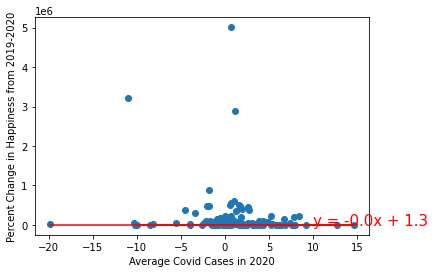

In [13]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(y,x)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(y,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Average Covid Cases in 2020')
plt.ylabel('Percent Change in Happiness from 2019-2020')
plt.show()

In [14]:
covid_df2 = pd.read_csv("covid_data2.csv")
covid_df2

,\,continent,location,date,Year,total_cases
0,AFG,Asia,Afghanistan,2020-02-24,2020,1.0
1,AFG,Asia,Afghanistan,2020-02-25,2020,1.0
2,AFG,Asia,Afghanistan,2020-02-26,2020,1.0
3,AFG,Asia,Afghanistan,2020-02-27,2020,1.0
4,AFG,Asia,Afghanistan,2020-02-28,2020,1.0
...,...,...,...,...,...,...
112452,ZWE,Africa,Zimbabwe,2021-08-23,2021,123001.0
112453,ZWE,Africa,Zimbabwe,2021-08-24,2021,123320.0
112454,ZWE,Africa,Zimbabwe,2021-08-25,2021,123711.0
112455,ZWE,Africa,Zimbabwe,2021-08-26,2021,123986.0


In [15]:
covid_df2 = covid_df2.groupby(['location'], as_index=False).sum()
covid_df2.head()

,location,Year,total_cases
0,Afghanistan,1113259,2.830887e+07
1,Africa,1135479,1.440177e+09
2,Albania,1111239,3.180323e+07
3,Algeria,1111239,4.171451e+07
4,Andorra,1099119,3.666725e+06


In [16]:
#Merge the happiness_2020 and covid_df dataframes to keep data for countries only present in both dataframes
covid_df2 = covid_df2.rename(columns = {'location': 'Country'})
covid_df2

,Country,Year,total_cases
0,Afghanistan,1113259,2.830887e+07
1,Africa,1135479,1.440177e+09
2,Albania,1111239,3.180323e+07
3,Algeria,1111239,4.171451e+07
4,Andorra,1099119,3.666725e+06
...,...,...,...
228,Wallis and Futuna,311234,0.000000e+00
229,World,1179919,4.336050e+10
230,Yemen,1020339,1.594979e+06
231,Zambia,1066799,2.835048e+07


In [17]:
merged_df = happiness_2020.merge(covid_df2, on = 'Country' , how = 'left')
merged_df = merged_df.merge(covid_df, on = 'Country' , how = 'left')
merged_df.head()

,Unnamed: 0,Country,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year_x,Year_y,total_cases,Happiness Score 2019,Happiness Score 2020,Percent Change,Average Cases in 2020
0,5,Afghanistan,2.5669,0.300706,0.470367,52.590000,0.396573,0.135235,0.933687,1.507236,2020,1113259.0,28308870.0,3.203,2.5669,-19.859506,27197.25000
1,11,Albania,4.8827,0.906653,0.671070,68.708138,0.781994,0.171028,0.896304,1.640897,2020,1111239.0,31803228.0,4.719,4.8827,3.468955,12508.53691
2,17,Algeria,5.0051,0.943856,0.803385,65.905174,0.466611,0.118915,0.735485,1.840812,2020,1111239.0,41714508.0,5.211,5.0051,-3.951261,34030.14469
3,27,Argentina,5.9747,1.028466,0.900568,68.803802,0.831132,0.070100,0.842010,2.072541,2020,1222339.0,920628841.0,6.086,5.9747,-1.828788,487948.75330
4,33,Armenia,4.6768,0.808262,0.757479,66.750656,0.712018,0.107226,0.773545,1.468162,2020,1101139.0,63076791.0,4.559,4.6768,2.583895,47559.07516


In [18]:
#drop null values from merged dataframe

merged_df = merged_df.dropna(subset = ["Percent Change","total_cases"])

In [19]:
#Regression 2: impact of total covid cases in 2020 on the percent change of happiness from 2019 through 2020

x2 = merged_df["total_cases"].tolist()
y2 = merged_df["Percent Change"].tolist()

In [20]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x2,y2)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.0x + 1.32
The p-value is: 0.083


In [21]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(ys * slope + intercept) for ys in y2]

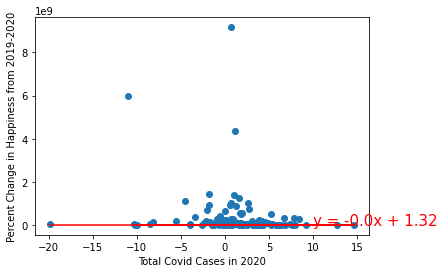

In [22]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(y2,x2)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(y,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Total Covid Cases in 2020')
plt.ylabel('Percent Change in Happiness from 2019-2020')
plt.show()

In [23]:
covid_df3 = pd.read_csv("covid_data3.csv")
covid_df3

,location,date,Year,total_deaths
0,Afghanistan,2020-02-24,2020,NaN
1,Afghanistan,2020-02-25,2020,NaN
2,Afghanistan,2020-02-26,2020,NaN
3,Afghanistan,2020-02-27,2020,NaN
4,Afghanistan,2020-02-28,2020,NaN
...,...,...,...,...
60126,Zimbabwe,2020-12-27,2020,349.0
60127,Zimbabwe,2020-12-28,2020,354.0
60128,Zimbabwe,2020-12-29,2020,359.0
60129,Zimbabwe,2020-12-30,2020,360.0


In [24]:
covid_df3 = covid_df3.groupby(['location'], as_index=False).sum()
covid_df3.head()

,location,Year,total_deaths
0,Afghanistan,630240,297323.0
1,Africa,652460,7001722.0
2,Albania,628220,88375.0
3,Algeria,628220,377806.0
4,Andorra,616100,15492.0


In [25]:
#Merge the happiness_2020 and covid_df dataframes to keep data for countries only present in both dataframes
covid_df3 = covid_df3.rename(columns = {'location': 'Country'})
covid_df3

,Country,Year,total_deaths
0,Afghanistan,630240,297323.0
1,Africa,652460,7001722.0
2,Albania,628220,88375.0
3,Algeria,628220,377806.0
4,Andorra,616100,15492.0
...,...,...,...
195,Vietnam,694880,4908.0
196,World,696900,233112045.0
197,Yemen,537320,108944.0
198,Zambia,583780,53042.0


In [26]:
merged_df = happiness_2020.merge(covid_df3, on = 'Country' , how = 'left')
merged_df = merged_df.merge(covid_df, on = 'Country' , how = 'left')
merged_df.head()

,Unnamed: 0,Country,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year_x,Year_y,total_deaths,Happiness Score 2019,Happiness Score 2020,Percent Change,Average Cases in 2020
0,5,Afghanistan,2.5669,0.300706,0.470367,52.590000,0.396573,0.135235,0.933687,1.507236,2020,630240.0,297323.0,3.203,2.5669,-19.859506,27197.25000
1,11,Albania,4.8827,0.906653,0.671070,68.708138,0.781994,0.171028,0.896304,1.640897,2020,628220.0,88375.0,4.719,4.8827,3.468955,12508.53691
2,17,Algeria,5.0051,0.943856,0.803385,65.905174,0.466611,0.118915,0.735485,1.840812,2020,628220.0,377806.0,5.211,5.0051,-3.951261,34030.14469
3,27,Argentina,5.9747,1.028466,0.900568,68.803802,0.831132,0.070100,0.842010,2.072541,2020,739320.0,3802826.0,6.086,5.9747,-1.828788,487948.75330
4,33,Armenia,4.6768,0.808262,0.757479,66.750656,0.712018,0.107226,0.773545,1.468162,2020,618120.0,248551.0,4.559,4.6768,2.583895,47559.07516


In [27]:
#drop null values from merged dataframe

merged_df = merged_df.dropna(subset = ["Percent Change","total_deaths"])

In [28]:
#Regression 3: impact of total covid deaths in 2020 on Happiness score in 2020
x3 = merged_df["total_deaths"].tolist()
y3 = merged_df["Happiness_Score"].tolist()

In [29]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x3,y3)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.0x + 5.42
The p-value is: 0.036


In [30]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(ys * slope + intercept) for ys in y3]

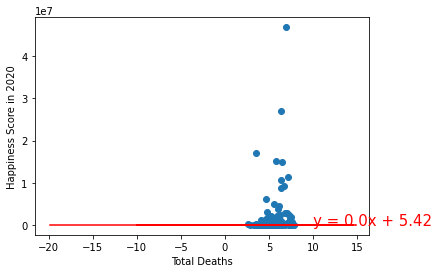

In [31]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(y3,x3)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(y,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Total Deaths')
plt.ylabel('Happiness Score in 2020')
plt.show()